In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4

In [163]:
import os
for dirname, _, filenames in os.walk('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_elevations.nc
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/.DS_Store
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/sampleSubmission.csv
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/test.csv
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_train.zip
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/station_info.csv
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_test.zip
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/train.csv
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/solar_training_199401_200712.csv
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_train.tar.gz
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_test.tar.gz
/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/w

In [164]:
# Configs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [165]:
from netCDF4 import Dataset
from os import listdir
# Lbraries to unzip compressed data folders
import tarfile
import zipfile
# some libraries for lat-long cartesian product
import itertools

In [166]:
df_train_csv = pd.read_csv('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/train.csv')
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 99 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Date    5113 non-null   int64
 1   ACME    5113 non-null   int64
 2   ADAX    5113 non-null   int64
 3   ALTU    5113 non-null   int64
 4   APAC    5113 non-null   int64
 5   ARNE    5113 non-null   int64
 6   BEAV    5113 non-null   int64
 7   BESS    5113 non-null   int64
 8   BIXB    5113 non-null   int64
 9   BLAC    5113 non-null   int64
 10  BOIS    5113 non-null   int64
 11  BOWL    5113 non-null   int64
 12  BREC    5113 non-null   int64
 13  BRIS    5113 non-null   int64
 14  BUFF    5113 non-null   int64
 15  BURB    5113 non-null   int64
 16  BURN    5113 non-null   int64
 17  BUTL    5113 non-null   int64
 18  BYAR    5113 non-null   int64
 19  CAMA    5113 non-null   int64
 20  CENT    5113 non-null   int64
 21  CHAN    5113 non-null   int64
 22  CHER    5113 non-null   int64
 23  CHEY    5113 

In [167]:
#We have decided not to use the elevations of the mesonet station to keep our model simple
elevations_nc = Dataset('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_elevations.nc')
print(repr(elevations_nc))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(16), lat(9)
    variables(dimensions): float32 elevation_control(lat, lon), float32 elevation_perturbation(lat, lon), float32 latitude(lat, lon), float32 longitude(lat, lon)
    groups: 


In [168]:
for dim in elevations_nc.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9


In [169]:
for var in elevations_nc.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 elevation_perturbation(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(lat, lon)
unlimited dimensions: 
current shape = (9, 16)
filling on, default _Fil

In [170]:
print(elevations_nc['elevation_control'])
elevation_control = elevations_nc['elevation_control'][:]
type(elevation_control)

<class 'netCDF4._netCDF4.Variable'>
float32 elevation_control(lat, lon)
    units: m
unlimited dimensions: 
current shape = (9, 16)
filling on, default _FillValue of 9.969209968386869e+36 used


numpy.ma.core.MaskedArray

In [171]:
elevation_control

masked_array(
  data=[[1420.6992  , 1346.99    , 1323.4714  ,  878.6121  ,  801.2428  ,
          772.9914  ,  680.35266 ,  468.4641  ,  336.59415 ,  120.04214 ,
           93.48233 ,   80.08353 ,   71.31673 ,   67.957   ,   10.965302,
           84.810104],
        [1474.9441  , 1352.801   ,  898.3811  ,  931.03394 ,  826.7518  ,
          727.6931  ,  609.3953  ,  482.50412 ,  337.76724 ,  183.77028 ,
          102.97228 ,  126.72296 ,   79.13975 ,   45.891365,   33.39725 ,
           45.70796 ],
        [1580.3839  , 1424.2161  , 1176.4006  , 1125.1444  ,  948.3373  ,
          705.66315 ,  500.02255 ,  368.81665 ,  315.66757 ,  163.46469 ,
          154.10419 ,  121.9053  ,   75.232796,   77.09505 ,   30.765553,
           26.19909 ],
        [1893.4783  , 1518.9108  , 1275.5542  , 1200.2124  , 1043.7601  ,
          853.4426  ,  502.6673  ,  344.78058 ,  267.40408 ,  229.86818 ,
          159.78786 ,  141.98071 ,  131.23152 ,   71.77977 ,   69.824265,
           45.698303],
      

In [172]:
elevation_perturbation = elevations_nc['elevation_perturbation'][:]
latitude = elevations_nc['latitude'][:]
longitude = elevations_nc['longitude'][:]

In [173]:
variables = [elevation_control, elevation_perturbation,latitude,longitude]
for v in variables:
    print(v.shape)

(9, 16)
(9, 16)
(9, 16)
(9, 16)


In [174]:
type(elevation_control[:].data)

numpy.ndarray

In [175]:
elevation_control[0]

masked_array(data=[1420.6992  , 1346.99    , 1323.4714  ,  878.6121  ,
                    801.2428  ,  772.9914  ,  680.35266 ,  468.4641  ,
                    336.59415 ,  120.04214 ,   93.48233 ,   80.08353 ,
                     71.31673 ,   67.957   ,   10.965302,   84.810104],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [176]:
df_elevation_control = pd.DataFrame(elevation_control[:].data)
type(df_elevation_control)

pandas.core.frame.DataFrame

In [177]:
df_elevation_control

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1420.699219,1346.989990,1323.471436,878.612122,801.242798,772.991394,680.352661,468.464111,336.594147,120.042137,93.482330,80.083527,71.316727,67.957001,10.965302,84.810104
1,1474.944092,1352.801025,898.381104,931.033936,826.751770,727.693115,609.395325,482.504120,337.767242,183.770279,102.972282,126.722961,79.139748,45.891365,33.397251,45.707958
2,1580.383911,1424.216064,1176.400635,1125.144409,948.337280,705.663147,500.022552,368.816650,315.667572,163.464691,154.104187,121.905296,75.232796,77.095047,30.765553,26.199089
3,1893.478271,1518.910767,1275.554199,1200.212402,1043.760132,853.442627,502.667297,344.780579,267.404083,229.868179,159.787857,141.980713,131.231522,71.779770,69.824265,45.698303
4,2056.118164,1627.268188,1443.419312,1297.534790,1129.409912,856.720764,585.322327,477.432709,372.147064,311.572968,228.103317,226.777283,252.789124,174.817612,96.601227,66.345665
5,2136.059326,2135.686768,1673.874634,1353.715820,1127.648193,882.939392,732.948853,570.209534,331.645935,289.740601,223.433182,266.801971,480.661011,412.313904,219.294525,84.053917
6,2485.795166,2755.628418,1979.368164,1442.644287,1107.213257,869.010681,642.570679,527.090881,371.196808,353.459686,246.525665,252.224960,389.459290,398.530365,365.619263,225.924500
7,2431.797852,2228.259277,1390.321289,1225.845215,1073.791382,897.483337,746.016968,617.190857,470.363831,428.248840,333.072662,303.259430,247.105286,279.319916,280.933289,275.796692
8,2919.751465,2586.268311,1825.946899,1453.338867,1187.619385,926.318298,748.107666,577.289062,439.656647,377.427307,341.752502,287.787567,249.048508,210.765778,249.279022,195.383102


In [178]:
df_elevation_perturbation = pd.DataFrame(elevation_perturbation[:].data)
df_latitude = pd.DataFrame(latitude[:].data)
df_longitude = pd.DataFrame(longitude[:].data)

In [179]:
df_elevation_perturbation

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1342.618286,1328.494019,1244.265381,919.849365,821.093567,758.447449,615.643372,470.274231,320.599396,140.990585,95.808876,76.553787,68.223305,54.343769,17.772333,68.332054
1,1378.946899,1413.052734,1016.232666,901.592529,857.843262,718.281189,608.255981,486.923950,339.535858,164.368851,117.535713,116.339043,77.805992,61.092579,23.557766,55.404343
2,1742.829468,1598.147095,1091.234985,1178.574707,909.058228,734.515381,526.780579,401.441864,306.543365,199.786942,154.201813,114.928963,67.071960,64.649948,41.842697,25.231009
3,1917.667603,1581.581421,1253.453613,1266.165649,1054.519165,810.194275,486.443268,356.452789,293.866455,243.864334,176.021362,179.507385,181.330063,103.315552,63.461838,43.063847
4,1943.164673,1737.107910,1346.499023,1267.450073,1100.414185,860.616638,591.403748,464.848663,393.638275,308.563354,239.184402,235.344528,261.833069,191.366211,103.257118,52.340797
5,2440.409424,2173.584961,1600.870117,1329.651855,1070.052246,925.863770,744.821289,552.047974,374.450439,293.335205,210.905609,247.777985,417.626984,374.962616,217.766586,97.133163
6,2644.048096,2512.552002,1908.914551,1526.862671,1099.935303,877.244324,699.824402,535.322266,379.931183,345.195251,265.756439,257.140961,350.137054,353.257263,329.077271,245.794418
7,2687.393066,2082.603271,1397.668945,1258.560547,1109.736816,912.408508,762.931458,630.918640,493.396973,429.999481,356.559753,282.100952,274.491608,297.353119,303.076538,276.219391
8,3124.591064,2300.221191,1725.342407,1475.911377,1166.599854,957.809692,731.922729,573.204895,446.799713,396.012909,352.090088,295.501587,254.907104,227.474518,224.604065,187.092941


In [180]:
df_latitude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
1,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
2,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
3,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
4,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
5,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
6,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
7,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
8,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0


In [181]:
df_longitude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
1,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
2,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
3,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
4,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
5,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
6,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
7,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0
8,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0


In [182]:
import tarfile


In [183]:
file_train = tarfile.open('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_train.tar.gz') 
file_train.extractall('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/working/tarzip')
file_train.close()

In [184]:
nc_pwat_eatm_latlon = Dataset('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/working/tarzip/train/pwat_eatm_latlon_subset_19940101_20071231.nc')
print(repr(nc_pwat_eatm_latlon))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    title: Subset of data from 2nd-generation multi-decadal ensemble reforecast generated from the NCEP Global Ensemble Forecast System, mimicking version operational at NCEP/EMC circa mid-2012.
    institution: NOAA Earth System Research Laboratory (ESRL)
    source: NCEP GFS v 9.01, T254L42.  Control initial conditions from CFSRR.  Perturbed initial conditions from ETR.  Model error simulated with STTP.
    references: http://www.esrl.noaa.gov/psd/forecasts/reforecast2/index.html
    history: Subset created 2013-01-15 19:18:02 UTC
    comment: Original dataset generated on DOE's supercomputers at Lawrence Berkeley Laboratory through ALCC/ASCR grant.
    dimensions(sizes): time(5113), lat(9), lon(16), ens(11), fhour(5)
    variables(dimensions): float64 time(time), int32 intTime(time), float32 lat(lat), float32 lon(lon), int16 ens(ens), int32 fhour(fhour), int32 intValidTime(t

In [185]:
for dim in nc_pwat_eatm_latlon.dimensions.values():
    print(dim)
    
#variables
for var in nc_pwat_eatm_latlon.variables.values():
    print(var)
    print("--"*50)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 5113
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 9
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 16
<class 'netCDF4._netCDF4.Dimension'>: name = 'ens', size = 11
<class 'netCDF4._netCDF4.Dimension'>: name = 'fhour', size = 5
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    units: hours since 1800-01-01 00:00:00
    axis: T
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of 9.969209968386869e+36 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
int32 intTime(time)
    long_name: time as an integer (YYYYMMDDHH)
unlimited dimensions: 
current shape = (5113,)
filling on, default _FillValue of -2147483647 used
----------------------------------------------------------------------------------------------------
<class 'netCDF4._netCDF4.Variable'>
float32 la

In [186]:
nc_time = nc_pwat_eatm_latlon['time'][:]
nc_time

masked_array(data=[1700568., 1700592., 1700616., ..., 1823208., 1823232.,
                   1823256.],
             mask=False,
       fill_value=1e+20)

In [187]:
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['time'][:][:].data)
df_nc_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5113 non-null   float64
dtypes: float64(1)
memory usage: 40.1 KB


In [188]:
df_nc_lat = pd.DataFrame(nc_pwat_eatm_latlon['lat'][:][:].data)
df_nc_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float32
dtypes: float32(1)
memory usage: 168.0 bytes


In [189]:
df_nc_lat

,0
0,31.0
1,32.0
2,33.0
3,34.0
4,35.0
5,36.0
6,37.0
7,38.0
8,39.0


In [190]:
df_nc_lon = pd.DataFrame(nc_pwat_eatm_latlon['lon'][:][:].data)
df_nc_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16 non-null     float32
dtypes: float32(1)
memory usage: 196.0 bytes


In [191]:
df_nc_ens = pd.DataFrame(nc_pwat_eatm_latlon['ens'][:][:].data)
df_nc_ens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11 non-null     int16
dtypes: int16(1)
memory usage: 154.0 bytes


In [192]:
df_nc_ens
df_nc_fhour = pd.DataFrame(nc_pwat_eatm_latlon['fhour'][:][:].data)
df_nc_fhour.info()
df_nc_fhour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5 non-null      int32
dtypes: int32(1)
memory usage: 152.0 bytes


,0
0,12
1,15
2,18
3,21
4,24


In [193]:
#Aggregating over hour dimension: using mean value instead of 3hourly observations

In [194]:
# Precipitable_water
nc_prcp = list(nc_pwat_eatm_latlon.variables.values())[-1]
#nc_prcp = nc_pwat_eatm_latlon['Precipitable_water'][:]
print("Index 2 refers to the hours: ")
print("Values for: \n -the first day, \n -first ensemble model, \n -first latitude, \n -first longitude, \n -and hours, 12-15-18-21-24 ")
print("=="*50, "\n")
print(nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0])
print("=="*50, "\n")
print("Average value we should expect to get if we take mean of ")
print(sum([nc_prcp[0,0,0,0,0], nc_prcp[0,0,1,0,0], nc_prcp[0,0,2,0,0], nc_prcp[0,0,3,0,0], nc_prcp[0,0,4,0,0]])/5)
nc_4dim = np.mean(nc_prcp, axis=2)
nc_4dim[0,0,0,0]

Index 2 refers to the hours: 
Values for: 
 -the first day, 
 -first ensemble model, 
 -first latitude, 
 -first longitude, 
 -and hours, 12-15-18-21-24 

5.7 5.6 6.1 6.4 6.7

Average value we should expect to get if we take mean of 
6.099999904632568


6.1

In [195]:
nc_4dim.shape

(5113, 11, 9, 16)

In [196]:
# some libraries for lat-long cartesian product
import itertools

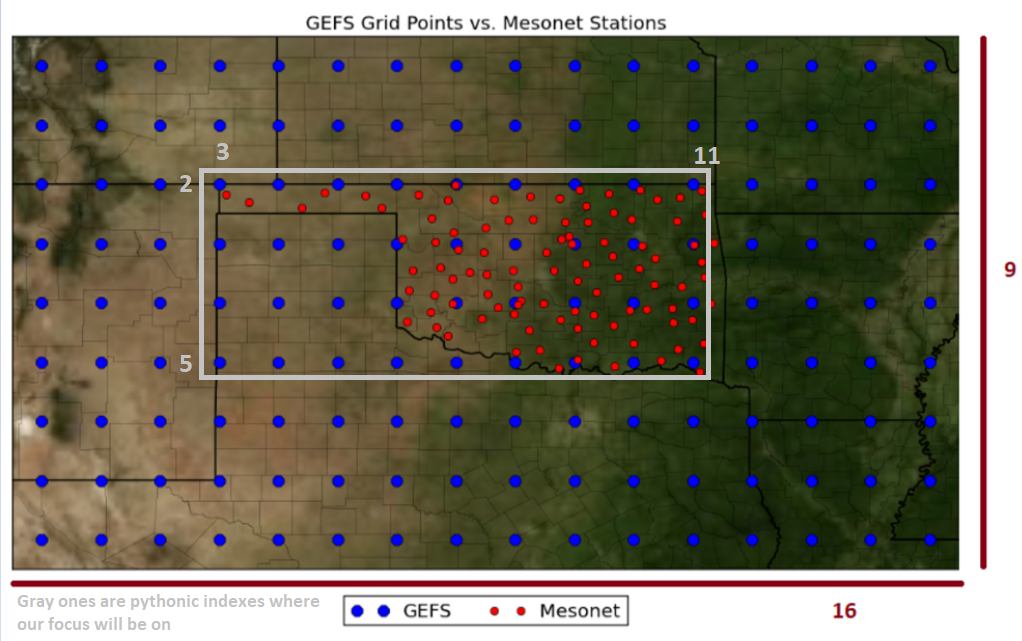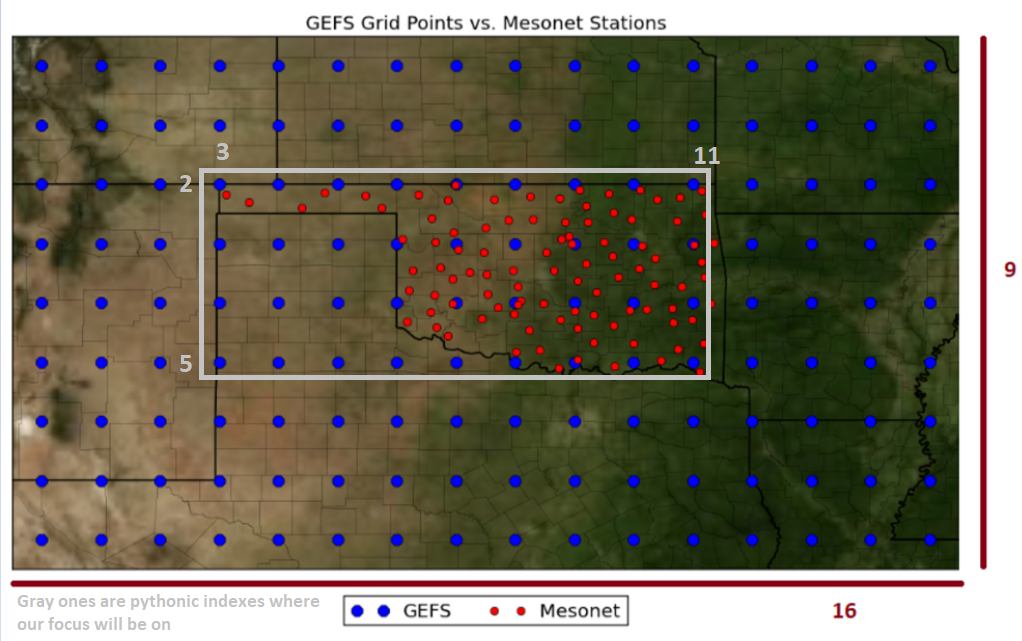

In [197]:
nc_pwat_eatm_latlon['lat'][:][:].data[2:6]
nc_pwat_eatm_latlon['lon'][:][:].data[3:12]
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
latlon

[(33.0, 257.0),
 (33.0, 258.0),
 (33.0, 259.0),
 (33.0, 260.0),
 (33.0, 261.0),
 (33.0, 262.0),
 (33.0, 263.0),
 (33.0, 264.0),
 (33.0, 265.0),
 (34.0, 257.0),
 (34.0, 258.0),
 (34.0, 259.0),
 (34.0, 260.0),
 (34.0, 261.0),
 (34.0, 262.0),
 (34.0, 263.0),
 (34.0, 264.0),
 (34.0, 265.0),
 (35.0, 257.0),
 (35.0, 258.0),
 (35.0, 259.0),
 (35.0, 260.0),
 (35.0, 261.0),
 (35.0, 262.0),
 (35.0, 263.0),
 (35.0, 264.0),
 (35.0, 265.0),
 (36.0, 257.0),
 (36.0, 258.0),
 (36.0, 259.0),
 (36.0, 260.0),
 (36.0, 261.0),
 (36.0, 262.0),
 (36.0, 263.0),
 (36.0, 264.0),
 (36.0, 265.0)]

## Combining GEFS coordinates & date

In [198]:
len(latlon)
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
df_nc_time[0].apply(lambda x: int(str(x)[:8])).head()
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
date_latlon[0]
len(date_latlon)
5113*36
latlon = list(itertools.product(nc_pwat_eatm_latlon['lat'][:][:].data[2:6], nc_pwat_eatm_latlon['lon'][:][:].data[3:12]))
df_nc_time = pd.DataFrame(nc_pwat_eatm_latlon['intValidTime'][:][:].data)
date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
df_gefs.shape
#df_gefs.rename({0:"date",1:"coordinates"}, axis=1, inplace=True)
df_gefs.head()

,date,coordinates
0,19940101,"(33.0, 257.0)"
1,19940101,"(33.0, 258.0)"
2,19940101,"(33.0, 259.0)"
3,19940101,"(33.0, 260.0)"
4,19940101,"(33.0, 261.0)"


### Experimenting with 4 dimensional data & cropping it based on area we selected to work on

In [199]:
nc_4dim.shape

(5113, 11, 9, 16)

In [200]:
nc_4dim_cropped = nc_4dim[:,:,2:6,3:12]

In [201]:
nc_4dim_cropped.shape

(5113, 11, 4, 9)

In [202]:
5113*4*9

184068

In [203]:
# x =  nc_4dim_cropped.reshape(5113*4*9,11)
y = pd.DataFrame(nc_4dim_cropped.reshape(5113*4*9,11))
print(y.shape)
y.head()

(184068, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,5.760000,6.260000,6.800000,7.180000,7.300000,7.660000,8.980000,10.920000,12.960001,6.140000,6.320000
1,6.960000,7.780000,7.780000,7.660000,8.120000,9.340000,10.740000,6.340000,6.580000,7.159999,7.700000
2,7.940000,8.100000,8.100000,8.500000,9.240000,6.300000,6.660000,7.020000,7.460000,8.339999,9.040001
3,8.960001,9.039999,9.100000,5.810383,6.250383,6.630383,7.110383,7.310383,7.690382,9.010382,10.990383
4,13.090384,6.110383,6.330382,6.970383,7.890382,7.970383,7.830383,8.290382,9.590383,11.050383,6.250383


In [204]:
nc_4dim_cropped.reshape(5113*4*9,11)

masked_array(
  data=[[ 5.76     ,  6.26     ,  6.8      , ..., 12.960001 ,  6.14     ,
          6.3199997],
        [ 6.96     ,  7.78     ,  7.78     , ...,  6.5800004,  7.159999 ,
          7.7      ],
        [ 7.94     ,  8.1      ,  8.1      , ...,  7.46     ,  8.339999 ,
          9.040001 ],
        ...,
        [ 4.6818166,  5.041816 ,  5.5018167, ...,  3.8218162,  4.121816 ,
          4.621816 ],
        [ 5.1418166,  5.6418166,  6.1618166, ...,  4.301816 ,  4.7218165,
          5.1818166],
        [ 5.881817 ,  6.561816 ,  4.2018166, ...,  5.2018166,  5.9618163,
          6.7018166]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

## Building Data Pre-Processing Process¶
1. File extraction for GEFS variables
2. Reshaping & aggregating dimensions
3. Cropping based on given coordinates
4. Calculate haversine distance between mesonets & GEFS
5. Mapping mesonets to closest GEFS points

In [205]:
from os import listdir

In [206]:
def unzip_gefs(directory:str, dest_path:str='tarzip')->str:
    file_train = tarfile.open(directory) 
    file_train.extractall(f'/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/working{dest_path}')
    file_train.close()
    return "Unzipped files!"

In [207]:
unzip_gefs(directory='/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/gefs_train.tar.gz')

'Unzipped files!'

In [208]:
def pre_processing(data_dir='/kaggle/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12):
    # Looping through files holding GEFS data  
    for n,f in enumerate(listdir(f'{data_dir}')):
        #print(n,f)
        # Reading data
        nc_ = Dataset(f'{data_dir}{f}')

        # extracting GEFS variable from netcdf
        nc_gefs = list(nc_.variables.values())[-1]
        
        if agg_dims == 'hours':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)
            
        elif agg_dims == 'ens_models':
            # taking mean of the measurements taken in different times
            #print(f"shape before processing {nc_gefs.shape}")
            nc_agg = np.mean(nc_gefs, axis=1)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape) 
            
        else:
            # taking mean of the measurements taken in different times
            nc_agg = np.mean(nc_gefs, axis=2)
            #print("shape after taking mean of hours:")
            #print(nc_agg.shape)
            nc_agg = np.mean(nc_agg, axis=1)
            #print("shape after taking mean of ensembles:")
            #print(nc_agg.shape)
        
        #print("=="*50)
        #print("AGGREGATING DONE!")
        #print("STARTING CROPPING...")

        # cropping GEFS based on lat-lon
        if agg_dims == 'hours':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:,crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end] 
            #print(f"shape after crop {nc_agg_cropped.shape}")
        elif agg_dims == 'ens_models':
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:,:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end] 
            #print(f"shape after crop {nc_agg_cropped.shape}")
        else:
            #print(f"shape before crop {nc_agg.shape}")
            nc_agg_cropped = nc_agg[:, crop_gefs_x_start:crop_gefs_x_end,crop_gefs_y_start:crop_gefs_y_end] 
            #print(f"shape after crop {nc_agg_cropped.shape}")

        #print("=="*50)
        #print("CROPPING DONE!")
        #print("STARTING RESHAPING...")
        
        # reshaping into 2 dimensions & converting to dataframe
        if agg_dims == 'hours':
            #print("we gotta form the shape dynamically too, rather than just giving the numbers")
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9*11
        elif agg_dims == 'ens_models':
            #print(nc_agg_cropped.shape)
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape)//5,5)) #5113*4*9
        else:
            df_gefs_ = pd.DataFrame(nc_agg_cropped.reshape(np.prod(nc_agg_cropped.shape),1)) #5113*4*9
            
        #print("=="*50)
        #print("RESHAPING DONE!")
        #print("STARTING RENAMING...")

        # we will use the name of file to rename columns so we don't get confused as we keep appending files
        prefix = f.split("latlon")[0]

        # existing columns of dataframe we created
        cols = list(df_gefs_.columns)

        # creating new names for columns
        newcols = [prefix+str(c) for c in cols]

        # creating the dictionary to rename cols accordingly
        rename_cols = {cols[i]: newcols[i] for i in range(len(cols))}

        # changing names on the dataset & inplacing
        df_gefs_ = df_gefs_.rename(rename_cols, axis=1)
        
        if n == 0:  
            latlon = list(itertools.product(nc_['lat'][:][:].data[crop_gefs_x_start:crop_gefs_x_end], nc_['lon'][:][:].data[crop_gefs_y_start:crop_gefs_y_end]))
            df_nc_time = pd.DataFrame(nc_['intValidTime'][:][:].data)
            date_latlon = list(itertools.product(df_nc_time[0].apply(lambda x: int(str(x)[:8])),latlon))
            df_gefs = pd.DataFrame(date_latlon, columns=['date','coordinates'])
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            #df_ens = df_ens_[:] # ======> created to do some feature eng on GEFS variables later
        else:      
            df_gefs = pd.concat([df_gefs,df_gefs_], axis = 1)
            # printing shape to see if data is appended or duplicated
        #print(df_gefs.shape)
    return df_gefs

In [209]:
#df_gefs = pre_processing(data_dir='/kaggle/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
#df_gefs = pre_processing(data_dir='/kaggle/working/tarzip/train/', agg_dims='ens_models', crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
#df_gefs.shape

In [210]:
! pip install haversine

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [211]:
# needed for min distance calculations
from haversine import haversine
def custom_haversine(coord1, coordDf):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    source: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    l={}
    for coord2, n_coord2 in list(zip(coordDf.coord, coordDf.normalized_coord)):
        l[coord2] = haversine(coord1,n_coord2)
    return l  

In [212]:
def get_min_distance_node(df_gefs):
    """
    Normalizes the coordinates of GEFS points (they are greater than 180)
    Reads MES station info which includes MES coordinates
    Calculates haversine distance between a mesonet and all GEFS points, puts it into a dict and adds it to station info 
    Then calculates minimum distance & adds coordinate of the related GEFS as another column, 
    which will be used in join condition later when training set and labels are combined 
    """
    # Get normalized GEFS coordinates
    df_gefs_loc = pd.DataFrame(df_gefs['coordinates'].unique(), columns=['coord'])
    df_gefs_loc['normalized_coord'] = df_gefs_loc['coord'].apply( lambda x: (x[0], x[1]-360))
    # Read mesonet metadata
    df_mes = pd.read_csv("/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/station_info.csv")
    # zip coordinates for later calculations
    df_mes["coord"] = list(zip(df_mes.nlat, df_mes.elon))
    # calculate haversine distances between the area we cropped and mesonets
    df_mes['new_distances'] = df_mes['coord'].apply(lambda x: custom_haversine(x, df_gefs_loc))
    # Find minimum distance GEFS for every mesonet
    df_mes['min_dist_node'] = df_mes['new_distances'].apply(lambda x: list(x.keys())[list(x.values()).index(min(x.values()))])
    return df_mes

In [213]:
def get_one_ens(df_gefs, ens_model=0):
    """
    can be used when no aggregations are made on ensemble models and we want to select a subset of models. 
    """
    # taking only one ensemble model = number 0
    #ens = ['date', 'coordinates']
    ens = [col for col in df_gefs.columns if col.split("_")[-1]==f"{ens_model}" ]
    ens.insert(0,'date')
    ens.insert(1,'coordinates')
    # crop df_gefs based on the ens model we wanna get
    df_gefs_ens = df_gefs[ens]
    return df_gefs_ens

In [214]:
def combine_ens_gefs(df_mes, df_train_csv):
    """
    Joins labels (daily solar power production) with related GEFS point (closest GEFS in grid)
    """
    # create mesonet list
    mesonets = list(df_mes['stid'])
    # melt training dataframe so mesonets are in rows instead of columns
    df_train = pd.melt(df_train_csv, id_vars='Date', value_vars=mesonets,\
                 var_name='stid', value_name='Daily_Production')
    # combine distance related features from metadata to training data
    df_train = pd.merge(df_train, df_mes[['stid','new_distances','min_dist_node']], on='stid', how='left')
    # create join columns
    df_train['join'] = df_train['Date'].astype(str) + df_train['min_dist_node'].astype(str)
    df_gefs_ens['join'] = df_gefs_ens['date'].astype(str) + df_gefs_ens['coordinates'].astype(str)
    # join two dataframes
    df_train_merged = pd.merge(df_train, df_gefs_ens[['tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0','tmp_sfc_0', 'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0','pwat_eatm_0', 'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0','apcp_sfc_0', 'pres_msl_0', 'join']], how='left', on='join')
    return df_train_merged

In [215]:
# pipeline 
df_gefs = pre_processing(data_dir='/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/working/tarzip/train/', agg_dims=['hours','ens_models'], crop_gefs_x_start=2, crop_gefs_x_end=6, crop_gefs_y_start=3, crop_gefs_y_end=12)
df_mes = get_min_distance_node(df_gefs)
df_gefs_ens = get_one_ens(df_gefs)
df_train_csv = pd.read_csv('/Users/drishtant/Downloads/ams-2014-solar-energy-prediction-contest/train.csv')
df_train_merged = combine_ens_gefs(df_mes, df_train_csv)

In [216]:
df_train_merged.head()

,Date,stid,Daily_Production,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,19940101,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,19940102,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,19940103,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,19940104,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,19940105,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312


In [217]:
df_train_merged.tail()

,Date,stid,Daily_Production,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
501069,20071227,WYNO,1100400,"{(33.0, 257.0): 722.8614711653722, (33.0, 258....","(36.0, 264.0)","20071227(36.0, 264.0)",0.046865,236.124802,261.459259,273.457062,0.046182,141.636368,273.837097,270.691742,8.393450,62.818180,0.003518,312.219940,273.202271,0.061273,101702.375000
501070,20071228,WYNO,6705900,"{(33.0, 257.0): 722.8614711653722, (33.0, 258....","(36.0, 264.0)","20071228(36.0, 264.0)",0.016729,234.683121,245.916504,273.106506,0.016182,192.000000,273.525726,271.804077,6.573282,78.636360,0.003221,316.375061,272.577576,0.073273,102021.476562
501071,20071229,WYNO,10586400,"{(33.0, 257.0): 722.8614711653722, (33.0, 258....","(36.0, 264.0)","20071229(36.0, 264.0)",0.032451,225.256607,229.963287,272.254272,0.031091,205.818176,273.488312,269.128052,7.977341,83.400009,0.002941,309.676880,271.976257,0.000000,102192.023438
501072,20071230,WYNO,11281800,"{(33.0, 257.0): 722.8614711653722, (33.0, 258....","(36.0, 264.0)","20071230(36.0, 264.0)",0.000818,240.856552,224.866013,274.020721,0.000000,220.000000,275.913971,272.108948,4.595035,85.090904,0.003286,318.057678,274.491150,0.000000,101663.148438
501073,20071231,WYNO,11211300,"{(33.0, 257.0): 722.8614711653722, (33.0, 258....","(36.0, 264.0)","20071231(36.0, 264.0)",0.004425,243.565384,234.255112,274.953186,0.003636,214.545456,276.843842,274.026978,6.130955,77.727264,0.003335,323.534454,275.601959,0.000000,101990.328125


1. pwat_eatm_latlon_subset_19940101_20071231.nc ⇒ Precipitable_water
2. tcdc_eatm_latlon_subset_19940101_20071231.nc ⇒ Total_cloud_cover
3. spfh_2m_latlon_subset_19940101_20071231.nc ⇒ Specific_humidity_height_above_ground
4. dswrf_sfc_latlon_subset_19940101_20071231.nc ⇒ Downward_Short-Wave_Rad_Flux
5. tcolc_eatm_latlon_subset_19940101_20071231.nc ⇒ Total_Column-Integrated_Condensate
6. apcp_sfc_latlon_subset_19940101_20071231.nc ⇒ Total_precipitation
7. tmin_2m_latlon_subset_19940101_20071231.nc ⇒ Minimum_temperature
8. tmax_2m_latlon_subset_19940101_20071231.nc ⇒ Maximum_temperature
9. dlwrf_sfc_latlon_subset_19940101_20071231.nc ⇒Downward_Long-Wave_Rad_Flux
10. uswrf_sfc_latlon_subset_19940101_20071231.nc ⇒Upward_Short-Wave_Rad_Flux
11. ulwrf_sfc_latlon_subset_19940101_20071231.nc ⇒ Upward_Long-Wave_Rad_Flux_surface
12. pres_msl_latlon_subset_19940101_20071231.nc ⇒ Pressure
13. ulwrf_tatm_latlon_subset_19940101_20071231.nc ⇒ Upward_Long-Wave_Rad_Flux
14. tmp_sfc_latlon_subset_19940101_20071231.nc ⇒ Temperature_surface
15. tmp_2m_latlon_subset_19940101_20071231.nc ⇒ Temperature_height_above_ground

In [218]:
def check_multicollinearity(data:pd.DataFrame, is_gefs:bool)->pd.DataFrame:
    """
    Function to take a pandas dataframe and calculate VIF for multicollinearity
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
     
    data = sm.add_constant(data)

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    
    if is_gefs==True:
        desc_dict = { 
                    'tcolc_eatm_0': 'Total_Column-Integrated_Condensate',
                     'ulwrf_tatm_0': 'Upward_Long-Wave_Rad_Flux',
                     'dlwrf_sfc_0': 'Downward_Long-Wave_Rad_Flux',
                     'tmp_sfc_0': 'Temperature_surface',
                     'tcdc_eatm_0': 'Total_cloud_cover',
                     'dswrf_sfc_0': 'Downward_Short-Wave_Rad_Flux',
                     'tmax_2m_0': 'Maximum_temperature',
                     'tmin_2m_0': 'Minimum_temperature',
                     'pwat_eatm_0': 'Precipitable_water',
                     'uswrf_sfc_0': 'Upward_Short-Wave_Rad_Flux',
                     'spfh_2m_0': 'Specific_humidity_height_above_ground',
                     'ulwrf_sfc_0': 'Upward_Long-Wave_Rad_Flux_surface',
                     'tmp_2m_0': 'Temperature_height_above_ground',
                     'apcp_sfc_0': 'Total_precipitation',
                     'pres_msl_0': 'Pressure'}
        vif_data["desc"] = vif_data['feature'].map(desc_dict)

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    return vif_data

## PCA to get rid of multicollinearity

In [219]:
def principal_comp_analysis(data:pd.DataFrame, plot_exp_var:bool, n_comp:int=10)->pd.DataFrame:
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import MinMaxScaler
    import numpy as np
    
    # Since it is a variance minimizing exercise, we normalize our data before performing PCA on that. 
    # use minMax scaler
    min_max_scaler = MinMaxScaler()
    data_n = min_max_scaler.fit_transform(data)

    if plot_exp_var==True:
        import matplotlib.pyplot as plt

        pca = PCA()
        pca.fit(data_n)
        print("Explained variance from all features: ")
        print(pca.explained_variance_)
        # how to pick n_components for PCA
        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.xlabel('number of components')
        plt.ylabel('cumulative explained variance')
        plt.show()

    pca_res = PCA(n_components=n_comp)
    pcomp = pca_res.fit_transform(data_n)

    pca_df = pd.DataFrame(data = pcomp
                 , columns = [f'principal_component_{i}' for i in range(1,11)])

    return pca_df

In [220]:
df_train_merged.head()

,Date,stid,Daily_Production,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,19940101,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,19940102,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,19940103,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,19940104,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,19940105,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312


In [221]:
df_train_merged.columns

Index(['Date', 'stid', 'Daily_Production', 'new_distances', 'min_dist_node',
       'join', 'tcolc_eatm_0', 'ulwrf_tatm_0', 'dlwrf_sfc_0', 'tmp_sfc_0',
       'tcdc_eatm_0', 'dswrf_sfc_0', 'tmax_2m_0', 'tmin_2m_0', 'pwat_eatm_0',
       'uswrf_sfc_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'tmp_2m_0', 'apcp_sfc_0',
       'pres_msl_0'],
      dtype='object')

In [223]:
df_train_merged = df_train_merged.rename(columns={'Daily_Production': 'Daily Solar Energy'})

In [224]:
X = df_train_merged.drop(['Daily Solar Energy'], axis=1)
y = df_train_merged['Daily Solar Energy']

# Calculate correlation with target variable
corr = X.corrwith(y).sort_values()
print("Correlation with target variable:")
print(corr)

Correlation with target variable:
tcdc_eatm_0    -0.467513
tcolc_eatm_0   -0.467079
apcp_sfc_0     -0.294471
pres_msl_0     -0.203145
Date           -0.005180
pwat_eatm_0     0.224853
dlwrf_sfc_0     0.327998
spfh_2m_0       0.395207
tmin_2m_0       0.564548
tmp_2m_0        0.612552
tmax_2m_0       0.612744
ulwrf_sfc_0     0.623809
tmp_sfc_0       0.634328
ulwrf_tatm_0    0.648427
uswrf_sfc_0     0.783920
dswrf_sfc_0     0.875885
dtype: float64


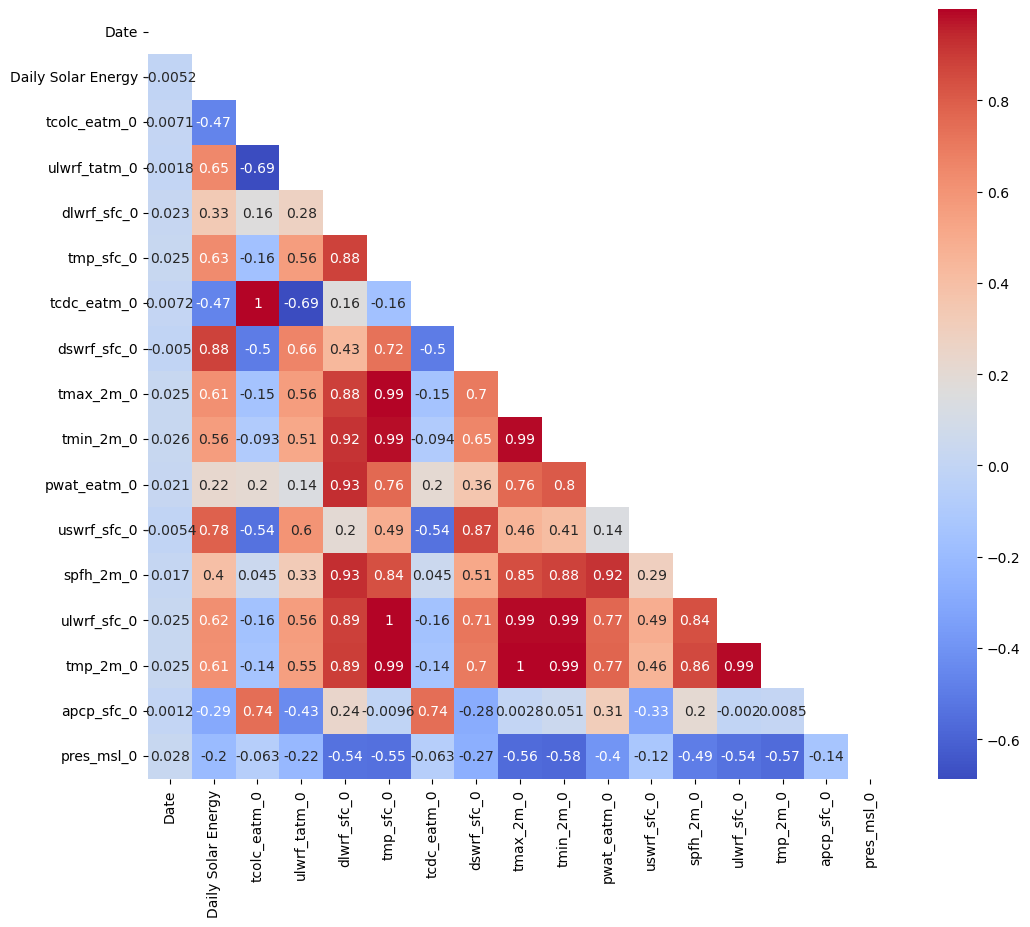

In [225]:
import seaborn as sns
corr_matrix = df_train_merged.corr()

# Create a mask to show only the correlation with the target variable
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', ax=ax)
plt.show()

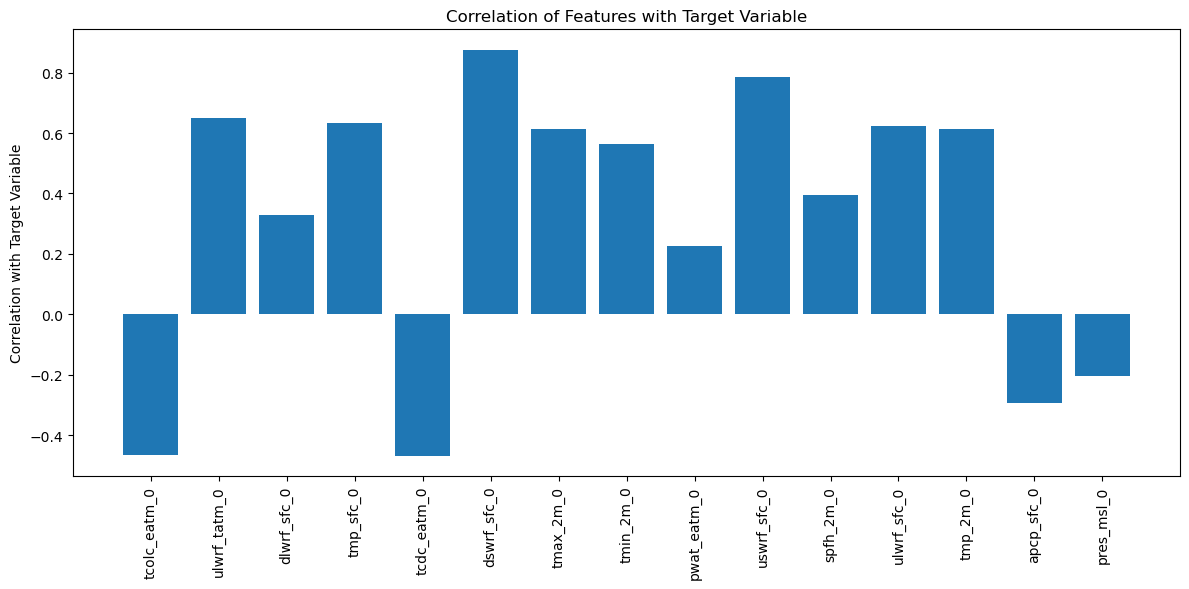

In [226]:
corr_with_target = {
    'tcolc_eatm_0': -0.467079,
    'ulwrf_tatm_0': 0.648427,
    'dlwrf_sfc_0': 0.327998,
    'tmp_sfc_0': 0.634328,
    'tcdc_eatm_0': -0.467513,
    'dswrf_sfc_0': 0.875885,
    'tmax_2m_0': 0.612744,
    'tmin_2m_0': 0.564548,
    'pwat_eatm_0': 0.224853,
    'uswrf_sfc_0': 0.783920,
    'spfh_2m_0': 0.395207,
    'ulwrf_sfc_0': 0.623809,
    'tmp_2m_0': 0.612552,
    'apcp_sfc_0': -0.294471,
    'pres_msl_0': -0.203145
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the correlation values as a bar plot
ax.bar(range(len(corr_with_target)), list(corr_with_target.values()), align='center')

# Set the x-axis ticks with the variable names
ax.set_xticks(range(len(corr_with_target)))
ax.set_xticklabels(list(corr_with_target.keys()), rotation=90)

# Set the y-axis label
ax.set_ylabel('Correlation with Target Variable')

# Set the title
ax.set_title('Correlation of Features with Target Variable')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

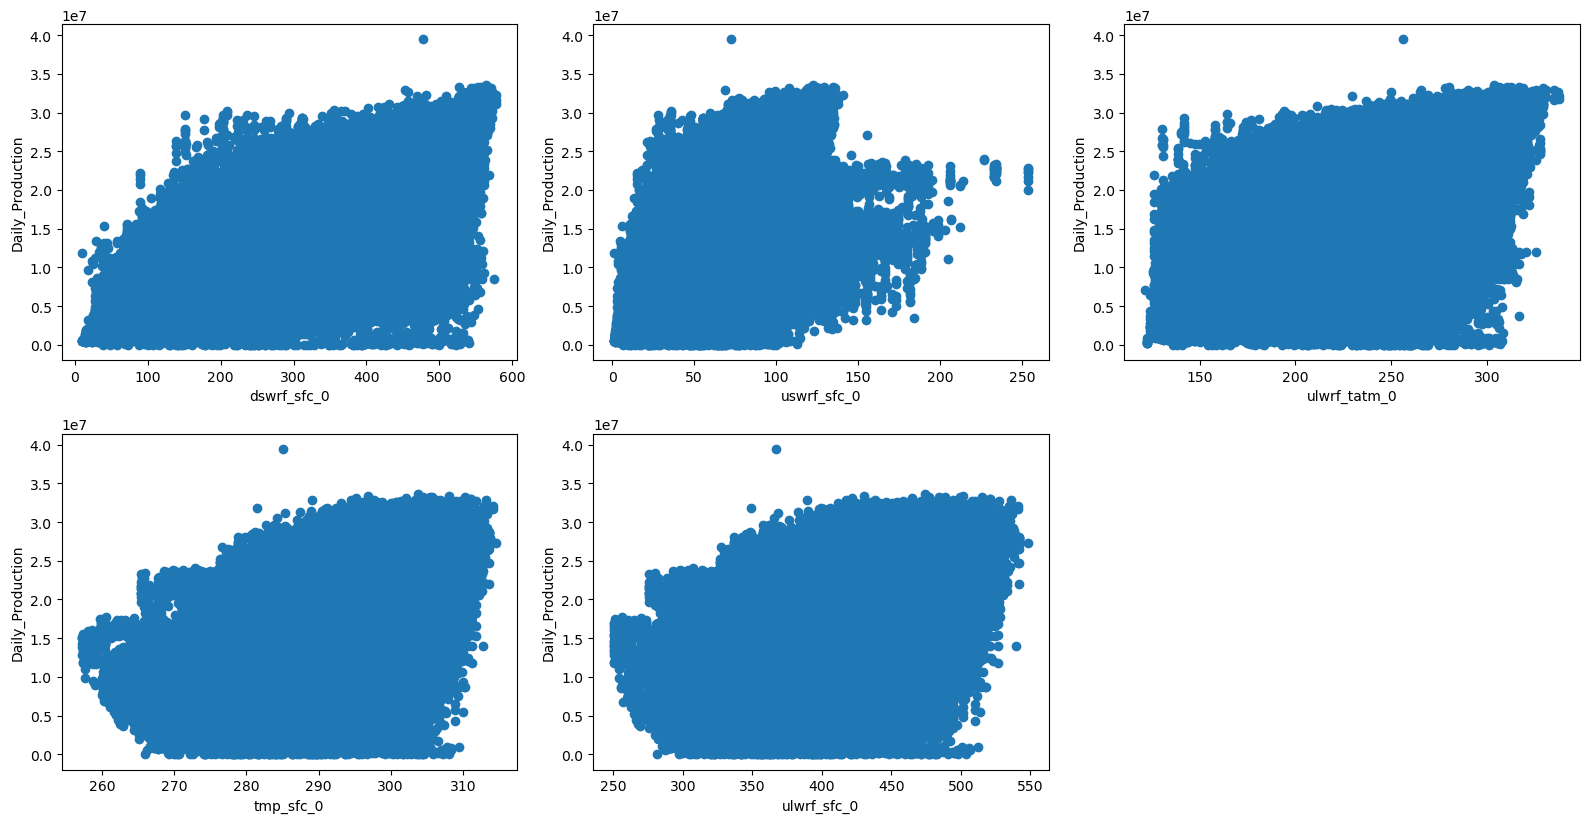

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for important features
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.scatter(df_train_merged['dswrf_sfc_0'], df_train_merged['Daily Solar Energy'])
plt.xlabel('dswrf_sfc_0')
plt.ylabel('Daily_Production')

plt.subplot(3, 3, 2)
plt.scatter(df_train_merged['uswrf_sfc_0'], df_train_merged['Daily Solar Energy'])
plt.xlabel('uswrf_sfc_0')
plt.ylabel('Daily_Production')

plt.subplot(3, 3, 3)
plt.scatter(df_train_merged['ulwrf_tatm_0'], df_train_merged['Daily Solar Energy'])
plt.xlabel('ulwrf_tatm_0')
plt.ylabel('Daily_Production')

plt.subplot(3, 3, 4)
plt.scatter(df_train_merged['tmp_sfc_0'], df_train_merged['Daily Solar Energy'])
plt.xlabel('tmp_sfc_0')
plt.ylabel('Daily_Production')

plt.subplot(3, 3, 5)
plt.scatter(df_train_merged['ulwrf_sfc_0'], df_train_merged['Daily Solar Energy'])
plt.xlabel('ulwrf_sfc_0')
plt.ylabel('Daily_Production')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Upward longwave Radiation Flux Surface Boxplot')

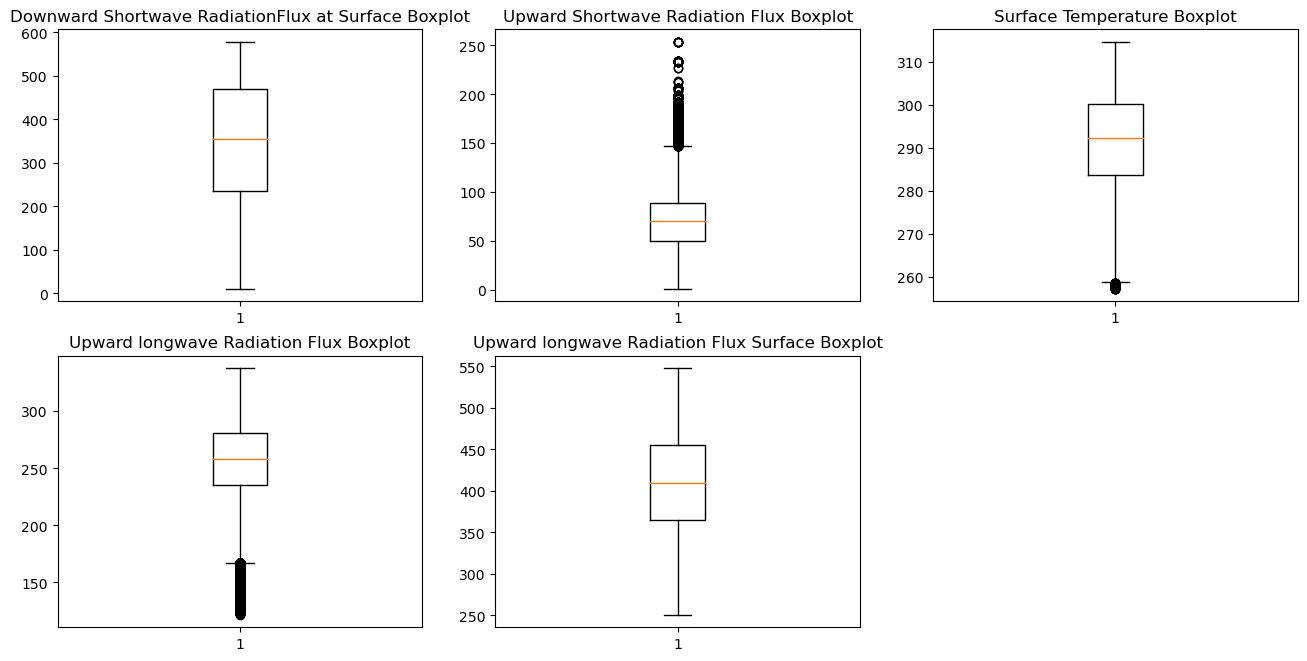

In [229]:
#Box Plot
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.boxplot(df_train_merged['dswrf_sfc_0'])
plt.title('Downward Shortwave RadiationFlux at Surface Boxplot')

plt.subplot(3, 3, 2)
plt.boxplot(df_train_merged['uswrf_sfc_0'])
plt.title('Upward Shortwave Radiation Flux Boxplot')

plt.subplot(3, 3, 3)
plt.boxplot(df_train_merged['tmp_sfc_0'])
plt.title('Surface Temperature Boxplot')


plt.subplot(3, 3, 4)
plt.boxplot(df_train_merged['ulwrf_tatm_0'])
plt.title('Upward longwave Radiation Flux Boxplot')

plt.subplot(3, 3, 5)
plt.boxplot(df_train_merged['ulwrf_sfc_0'])
plt.title('Upward longwave Radiation Flux Surface Boxplot')

In [230]:
df_train_merged.describe()

,Date,Daily Solar Energy,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
count,5.010740e+05,5.010740e+05,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000,501074.000000
mean,2.000567e+07,1.652610e+07,0.065191,254.109222,326.782745,291.593079,0.064815,347.467529,291.670441,287.563751,21.164484,68.378181,0.008413,409.077393,290.502930,0.413947,101634.414062
std,4.030896e+04,7.924359e+06,0.134307,34.826149,58.451965,10.092024,0.134475,133.571335,9.890221,9.490837,12.040062,25.797245,0.004653,54.381397,9.946116,1.236243,751.830872
min,1.994010e+07,3.000000e+02,0.000002,121.476776,162.342194,257.227417,0.000000,10.000000,257.263153,254.032410,1.281653,0.963636,0.000465,250.213623,255.956894,0.000000,98483.648438
25%,1.997070e+07,1.083840e+07,0.001358,235.290222,278.134392,283.636444,0.000545,234.109116,283.941650,280.159210,10.771314,50.345455,0.004239,364.895081,282.689774,0.000000,101177.476562
50%,2.000123e+07,1.644660e+07,0.010336,258.134979,328.763672,292.172241,0.009818,355.672729,292.410980,288.163361,18.691551,69.854546,0.007788,409.201691,291.211273,0.000727,101573.226562
75%,2.004070e+07,2.339400e+07,0.062858,280.606171,379.927277,300.285385,0.062727,470.272736,300.243652,295.920685,30.591619,89.018181,0.012357,455.692604,299.193329,0.173818,102044.406250
max,2.007123e+07,3.944280e+07,1.641818,337.788666,450.061554,314.654510,1.642000,578.345459,312.611664,306.227478,61.520447,253.527298,0.021240,548.160095,311.317047,25.841093,104534.125000


In [231]:
for column_name in df_train_merged.columns:
    null_count = df_train_merged[column_name].isnull().sum()
    print(f"Number of null values in {column_name}: {null_count}")


Number of null values in Date: 0
Number of null values in stid: 0
Number of null values in Daily Solar Energy: 0
Number of null values in new_distances: 0
Number of null values in min_dist_node: 0
Number of null values in join: 0
Number of null values in tcolc_eatm_0: 0
Number of null values in ulwrf_tatm_0: 0
Number of null values in dlwrf_sfc_0: 0
Number of null values in tmp_sfc_0: 0
Number of null values in tcdc_eatm_0: 0
Number of null values in dswrf_sfc_0: 0
Number of null values in tmax_2m_0: 0
Number of null values in tmin_2m_0: 0
Number of null values in pwat_eatm_0: 0
Number of null values in uswrf_sfc_0: 0
Number of null values in spfh_2m_0: 0
Number of null values in ulwrf_sfc_0: 0
Number of null values in tmp_2m_0: 0
Number of null values in apcp_sfc_0: 0
Number of null values in pres_msl_0: 0


In [232]:
df_train_merged.columns = df_train_merged.columns.str.replace('Daily_Production', 'Daily Solar Energy')

In [233]:
df_train_merged.head()

,Date,stid,Daily Solar Energy,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
0,19940101,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.383804,258.641876,282.548553,0.001273,219.090912,284.397064,280.260590,8.086300,47.745449,0.003322,364.319794,282.354309,0.000000,102023.781250
1,19940102,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.387222,279.489655,282.332153,0.069091,166.909088,283.792664,279.787262,11.476501,32.618183,0.003798,358.075287,282.072540,0.031273,101307.500000
2,19940103,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.279846,227.046585,277.426300,0.000909,225.327286,277.425568,273.055878,6.755241,49.072731,0.002511,335.168427,275.724640,0.000000,101984.921875
3,19940104,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.669937,238.266357,277.474640,0.002727,226.218170,278.947357,275.171509,5.734901,49.527271,0.002601,342.495178,276.330933,0.000909,102571.125000
4,19940105,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.216904,258.618134,282.668030,0.024364,219.454544,283.422028,278.554901,9.284234,46.636364,0.003136,353.977081,282.822815,0.000000,100769.320312
